# Review of wavelets available in `WaveFD`

`WaveFD` provides a set of standard wavelets available for use in seismic modeling. We demonstrate how to construct these wavelets below.

| Wavelet | Description |
|:---|:---|
| WaveletSine | monochromatic sinusoid wavelet |
| WaveletRicker | Ricker wavelet |
| WaveletMinPhaseRicker | Minimum phase Ricker wavelet |
| WaveletCausalRicker | Causal zero phase Ricker wavelet |
| WaveletOrmsby | Ormsby wavelet |
| WaveletMinPhaseOrmsby | Minimum phase Ormsby wavelet |

In [1]:
using FFTW, WaveFD, PyPlot, Statistics

## Setup the time and frequency domain axes

In [2]:
# time axis:
t = collect(0.0:0.004:4.0)

# frequency axis:
fn = 1 / (2*0.004)
df = fn / (length(t)/2+1)
f = collect(0.0:df:df*(length(t)/2));

## Generate the wavelets

In [3]:
# sinusoid wavelet:
wav = WaveletSine(a = 1.0, f = 2.5)
wSine = get(wav, t)

# ricker wavelet:
wav = WaveletRicker(a = 1.0, f = 10)
wRicker = get(wav, t .- mean(t))

# minimum phase ricker wavelet:
wav = WaveletMinPhaseRicker(a = 1.0, f = 10)
wMinPhaseRicker = get(wav, t)

# causal zero phase ricker wavelet:
wav = WaveletCausalRicker(a = 1.0, f = 10)
wCausalRicker = get(wav,t)

# Ormsby wavelet:
wav = WaveletOrmsby(a=1.0, f1=2.0, f2=5.0, f3=10.0, f4=13.0)
wOrmsby = get(wav, t .- mean(t))

# minimum phase Ormsby wavelet:
wav = WaveletMinPhaseOrmsby(a=1.0, f1=2.0, f2=5.0, f3=10.0, f4=13.0)
wMinPhaseOrmsby = get(wav, t);

## Plot the wavelets

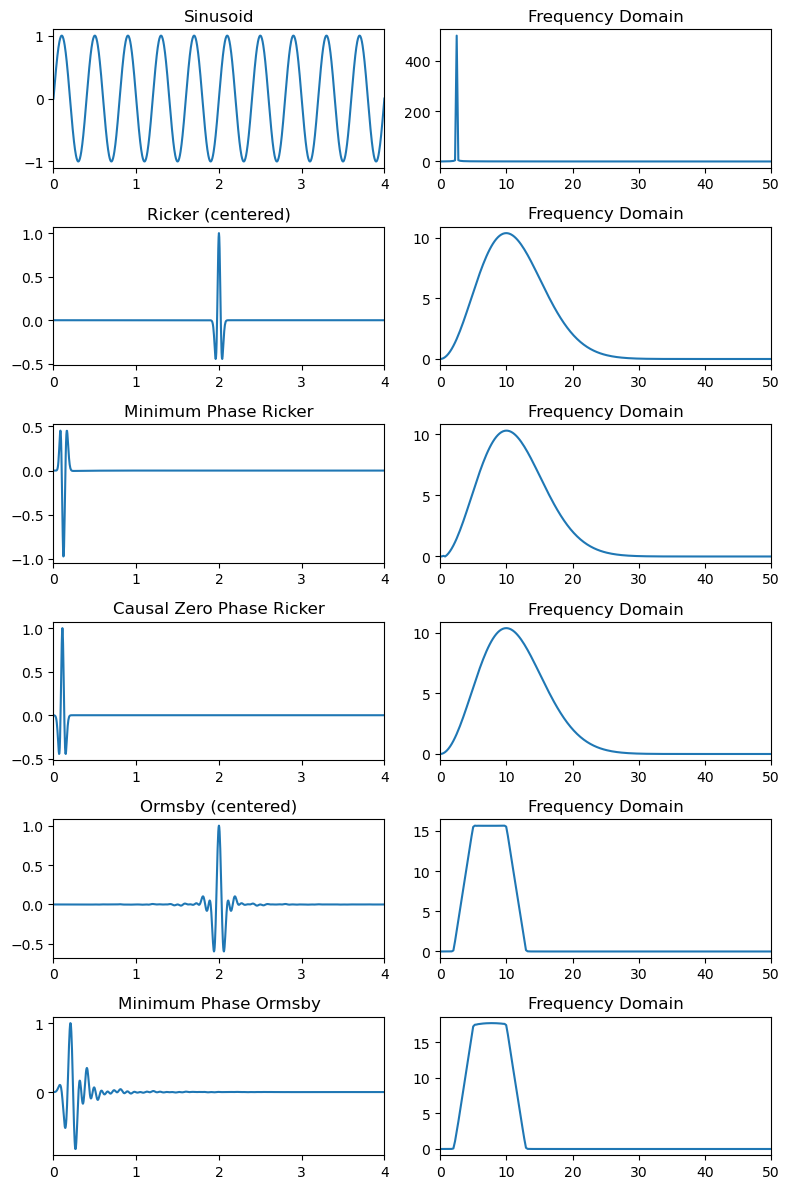

In [4]:
figure(figsize=(8,12)); clf()
tmin,tmax = extrema(t)
fmin,fmax = 0,50

subplot(6,2,1); plot(t,wSine);
xlim([tmin,tmax]); title("Sinusoid")
subplot(6,2,2); plot(f,abs.(rfft(wSine))); 
xlim([fmin,fmax]); title("Frequency Domain")

subplot(6,2,3); plot(t,wRicker);
xlim([tmin,tmax]); title("Ricker (centered)")
subplot(6,2,4); plot(f,abs.(rfft(wRicker))); 
xlim([fmin,fmax]); title("Frequency Domain")

subplot(6,2,5); plot(t,wMinPhaseRicker);
xlim([tmin,tmax]); title("Minimum Phase Ricker")
subplot(6,2,6); plot(f,abs.(rfft(wMinPhaseRicker))); 
xlim([fmin,fmax]); title("Frequency Domain")

subplot(6,2,7); plot(t,wCausalRicker);
xlim([tmin,tmax]); title("Causal Zero Phase Ricker")
subplot(6,2,8); plot(f,abs.(rfft(wCausalRicker))); 
xlim([fmin,fmax]); title("Frequency Domain")

subplot(6,2,9); plot(t,wOrmsby);
xlim([tmin,tmax]); title("Ormsby (centered)")
subplot(6,2,10); plot(f,abs.(rfft(wOrmsby))); 
xlim([fmin,fmax]); title("Frequency Domain")

subplot(6,2,11); plot(t,wMinPhaseOrmsby);
xlim([tmin,tmax]); title("Minimum Phase Ormsby")
subplot(6,2,12);plot(f,abs.(rfft(wMinPhaseOrmsby))); 
xlim([fmin,fmax]); title("Frequency Domain")

tight_layout()

## Integrated wavelets

Any of these wavelets can be intergrated, which can be useful for example with first order in time propagators. In order to obtain the intgrated wavelets, add the argument `integrate=true` to the constructor.

In [5]:
# sinusoid wavelet:
wav = WaveletSine(a = 1.0, f = 2.5, integrate = true)
wSineInt = get(wav, t)

# ricker wavelet:
wav = WaveletRicker(a = 1.0, f = 10, integrate = true)
wRickerInt = get(wav, t .- mean(t))

# minimum phase ricker wavelet:
wav = WaveletMinPhaseRicker(a = 1.0, f = 10, integrate = true)
wMinPhaseRickerInt = get(wav, t)

# causal zero phase ricker wavelet:
wav = WaveletCausalRicker(a = 1.0, f = 10, integrate = true)
wCausalRickerInt = get(wav,t)

# Ormsby wavelet:
wav = WaveletOrmsby(a=1.0, f1=2.0, f2=5.0, f3=10.0, f4=13.0, integrate = true)
wOrmsbyInt = get(wav, t .- mean(t))

# minimum phase Ormsby wavelet:
wav = WaveletMinPhaseOrmsby(a=1.0, f1=2.0, f2=5.0, f3=10.0, f4=13.0, integrate = true)
wMinPhaseOrmsbyInt = get(wav, t);

## Plot the integrated wavelets

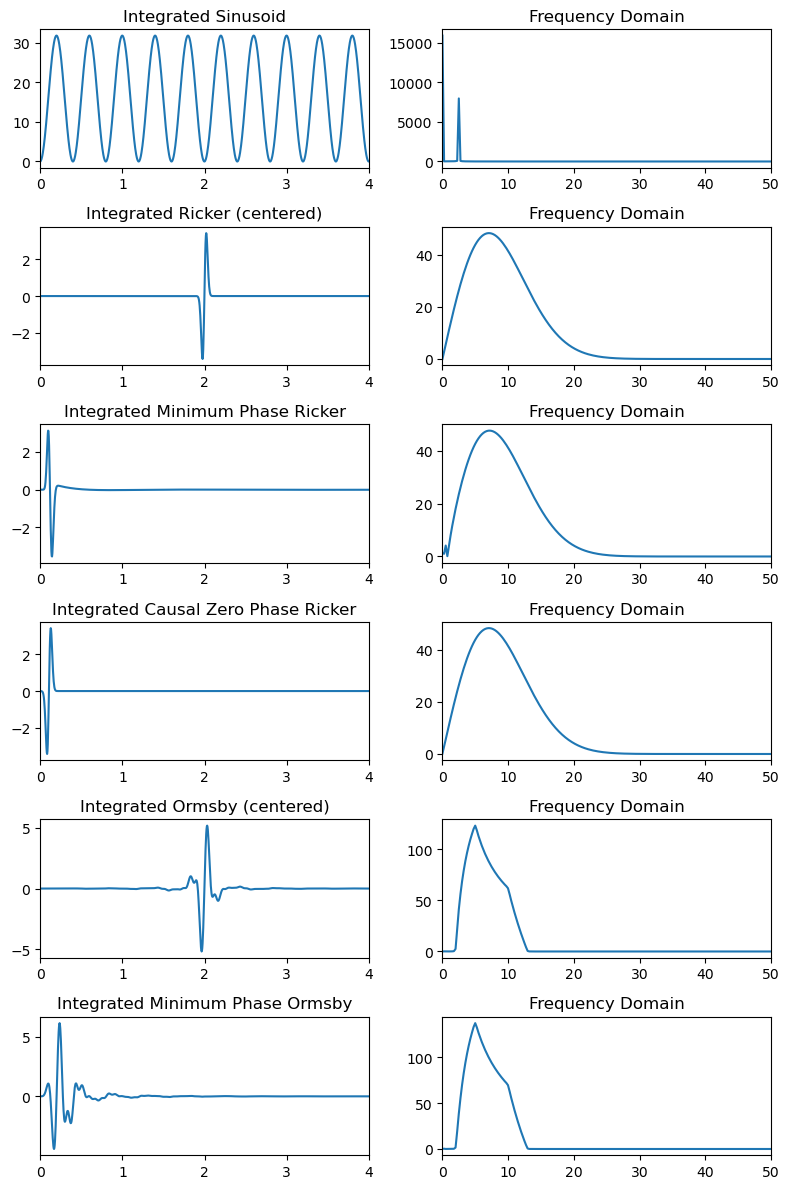

In [6]:
figure(figsize=(8,12)); clf()
tmin,tmax = extrema(t)
fmin,fmax = 0,50

subplot(6,2,1); plot(t,wSineInt);
xlim([tmin,tmax]); title("Integrated Sinusoid")
subplot(6,2,2); plot(f,abs.(rfft(wSineInt))); 
xlim([fmin,fmax]); title("Frequency Domain")

subplot(6,2,3); plot(t,wRickerInt);
xlim([tmin,tmax]); title("Integrated Ricker (centered)")
subplot(6,2,4); plot(f,abs.(rfft(wRickerInt))); 
xlim([fmin,fmax]); title("Frequency Domain")

subplot(6,2,5); plot(t,wMinPhaseRickerInt);
xlim([tmin,tmax]); title("Integrated Minimum Phase Ricker")
subplot(6,2,6); plot(f,abs.(rfft(wMinPhaseRickerInt))); 
xlim([fmin,fmax]); title("Frequency Domain")

subplot(6,2,7); plot(t,wCausalRickerInt);
xlim([tmin,tmax]); title("Integrated Causal Zero Phase Ricker")
subplot(6,2,8); plot(f,abs.(rfft(wCausalRickerInt))); 
xlim([fmin,fmax]); title("Frequency Domain")

subplot(6,2,9); plot(t,wOrmsbyInt);
xlim([tmin,tmax]); title("Integrated Ormsby (centered)")
subplot(6,2,10); plot(f,abs.(rfft(wOrmsbyInt))); 
xlim([fmin,fmax]); title("Frequency Domain")

subplot(6,2,11); plot(t,wMinPhaseOrmsbyInt);
xlim([tmin,tmax]); title("Integrated Minimum Phase Ormsby")
subplot(6,2,12);plot(f,abs.(rfft(wMinPhaseOrmsbyInt))); 
xlim([fmin,fmax]); title("Frequency Domain")

tight_layout()

## Phase shifted Ricker wavelets
`WaveletRicker` accepts an optional argument with the phase of the generated wavelet. We show Ricker wavelets with increasing phase shift below.

In [7]:
wav1 = get(WaveletRicker(a=1.0, f = 8.0, phase=0*π/4), -.5 .+ 0.004*collect(0:511))
wav2 = get(WaveletRicker(a=1.0, f = 8.0, phase=1*π/4), -.5 .+ 0.004*collect(0:511))
wav3 = get(WaveletRicker(a=1.0, f = 8.0, phase=2*π/4), -.5 .+ 0.004*collect(0:511))
wav4 = get(WaveletRicker(a=1.0, f = 8.0, phase=3*π/4), -.5 .+ 0.004*collect(0:511));

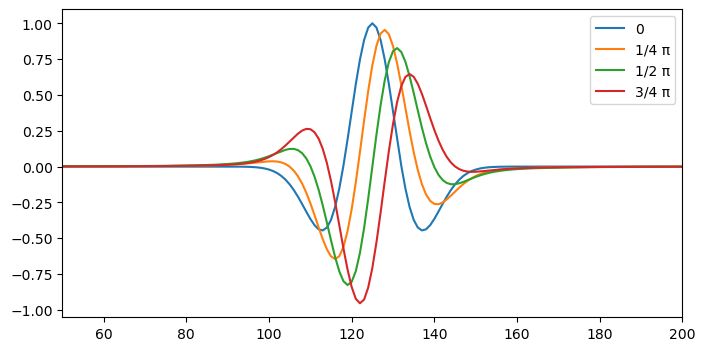

In [8]:
figure(figsize=(8,4)); clf()
plot(wav1, label="0")
plot(wav2, label="1/4 π")
plot(wav3, label="1/2 π")
plot(wav4, label="3/4 π")
xlim(50,200)
legend();